In [1]:
# Import Libraries
import torch
import torch.nn as nn
from torch.autograd import Variable
from torch.utils.data import DataLoader

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import os
print(os.listdir("./dataset/kaggle_input"))

from util.util_cnn import CNNModel, train_loader, test_loader

/Users/johannes/Applications/miniconda3/envs/msc/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


['test.csv', 'train.csv']


<a id="5"></a> <br>
### Convolutional Neural Network (CNN)
- CNN is well adapted to classify images.
- You can learn CNN basics: https://www.kaggle.com/kanncaa1/convolutional-neural-network-cnn-tutorial
- **Steps of CNN:**
    1. Import Libraries
    1. Prepare Dataset
        - Totally same with previous parts.
        - We use same dataset so we only need train_loader and test_loader. 
    1. Convolutional layer: 
        - Create feature maps with filters(kernels).
        - Padding: After applying filter, dimensions of original image decreases. However, we want to preserve as much as information about the original image. We can apply padding to increase dimension of feature map after convolutional layer.
        - We use 2 convolutional layer.
        - Number of feature map is out_channels = 16
        - Filter(kernel) size is 5*5
    1. Pooling layer: 
        - Prepares a condensed feature map from output of convolutional layer(feature map) 
        - 2 pooling layer that we will use max pooling.
        - Pooling size is 2*2
    1. Flattening: Flats the features map
    1. Fully Connected Layer: 
        - Artificial Neural Network that we learnt at previous part.
        - Or it can be only linear like logistic regression but at the end there is always softmax function.
        - We will not use activation function in fully connected layer.
        - You can think that our fully connected layer is logistic regression.
        - We combine convolutional part and logistic regression to create our CNN model.
    1. Instantiate Model Class
        - create model
    1. Instantiate Loss
        - Cross entropy loss
        - It also has softmax(logistic function) in it.
    1. Instantiate Optimizer
        - SGD Optimizer
    1. Traning the Model
    1. Prediction
- As a result, as you can see from plot, while loss decreasing, accuracy is increasing and our model is learning(training). 
- Thanks to convolutional layer, model learnt better and accuracy(almost 98%) is better than accuracy of ANN. Actually while tuning hyperparameters, increase in iteration and expanding convolutional neural network can increase accuracy but it takes too much running time that we do not want at kaggle.   
        

In [4]:
# batch_size, epoch and iteration
batch_size = 100
n_iters = 2500
num_epochs = num_epochs = n_iters / len(train_loader)
num_epochs = int(num_epochs)
    
# Create CNN
model = CNNModel()

# Cross Entropy Loss 
error = nn.CrossEntropyLoss()

# SGD Optimizer
learning_rate = 0.1
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)


In [5]:
# CNN model training
count = 0
loss_list = []
iteration_list = []
accuracy_list = []
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        
        train = Variable(images.view(100,1,28,28))
        labels = Variable(labels)
        
        # Clear gradients
        optimizer.zero_grad()
        
        # Forward propagation
        outputs = model(train)
        
        # Calculate softmax and ross entropy loss
        loss = error(outputs, labels)
        
        # Calculating gradients
        loss.backward()
        
        # Update parameters
        optimizer.step()
        
        count += 1
        
        if count % 50 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
                
                test = Variable(images.view(100,1,28,28))
                
                # Forward propagation
                outputs = model(test)
                
                # Get predictions from the maximum value
                predicted = torch.max(outputs.data, 1)[1]
                
                # Total number of labels
                total += len(labels)
                
                correct += (predicted == labels).sum()
            
            accuracy = 100 * correct / float(total)
            
            # store loss and iteration
            loss_list.append(loss.data)
            iteration_list.append(count)
            accuracy_list.append(accuracy)
        if count % 500 == 0:
            # Print Loss
            print('Iteration: {}  Loss: {}  Accuracy: {} %'.format(count, loss.data, accuracy))

Iteration: 500  Loss: 0.10762851685285568  Accuracy: 96.70237731933594 %
Iteration: 1000  Loss: 0.04616377875208855  Accuracy: 97.69047546386719 %
Iteration: 1500  Loss: 0.05348445847630501  Accuracy: 97.82142639160156 %
Iteration: 2000  Loss: 0.018362153321504593  Accuracy: 98.23809814453125 %


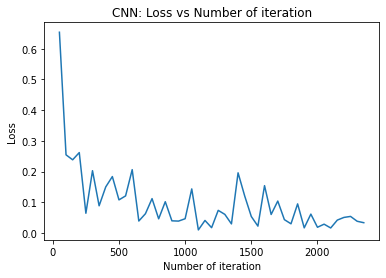

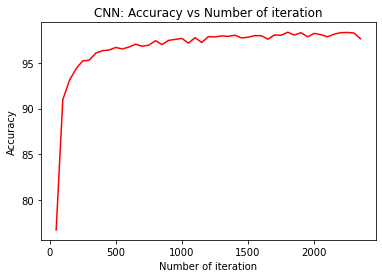

In [6]:
# visualization loss 
plt.plot(iteration_list,loss_list)
plt.xlabel("Number of iteration")
plt.ylabel("Loss")
plt.title("CNN: Loss vs Number of iteration")
plt.show()

# visualization accuracy 
plt.plot(iteration_list,accuracy_list,color = "red")
plt.xlabel("Number of iteration")
plt.ylabel("Accuracy")
plt.title("CNN: Accuracy vs Number of iteration")
plt.show()

In [8]:
model

CNNModel(
  (cnn1): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1))
  (relu1): ReLU()
  (maxpool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (cnn2): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1))
  (relu2): ReLU()
  (maxpool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=512, out_features=10, bias=True)
)

In [10]:
torch.save(model.state_dict(), "./models/mnist_cnn_v3.torch")